# Comparison of the Covid-19 spread among European Countries 
## by Leopold Walther

## Investigation Overview

The main question which made me start the analysis is: What is the best strategy for a state to battle the Covid-19 outbreak. There are several debates on how to act on overcoming this global pandemic. 

There are goverments that want to prevent overburdening of the health system through the lockdown like the spanish or german, while other countries rely on the responsibility of the individual without major restrictions, namely the swedish. Futhermore, there are governments that evaluate the economic damage through a lockdown more dramatically than the effects of the virus itself. 


## Dataset Overview

Base of this analysis is data related to the spread of Covid-19 over time by the [John Hopkins University](https://hub.jhu.edu/novel-coronavirus-information/). 

This data is complemented by statistics about tests and other generic information about countries gathered by the [Unitversity of Oxford](https://ourworldindata.org/about).

Statistics regarding the distribution of the population among household sizes in Europe are retrieved from the [European statistical database](https://ec.europa.eu/eurostat/data/database).


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_covidCases_today_NSE = pd.read_csv('outputData/df_VIS_covidCases_today_NSE.csv')
df_covidCases_today_NE = pd.read_csv('outputData/df_VIS_covidCases_today_NE.csv')
df_covidCases_today = pd.read_csv('outputData/df_VIS_covidCases_today.csv')
df_householdsEU_Timeline_NSE_2018 = pd.read_csv('outputData/df_VIS_householdsEU_Timeline_NSE_2018.csv')

## Distribution of population per household size for different countries

We can see in the graphic below of the population distribution per household size for the elected european countries, that the household sizes in Norway, Denmark, Sweden and Germany are comparable. The household sizes in Italy, United Kingdom, Spain and Portugal have a higher share of households with more than three people.
Knowing the distribution of population on household sizes for Europe we can look into a possible correlation between household sizes and confirmed cases of Covid-19. The idea is that if one person of a household is infected with Covid-19, the probability of infecting the other people in the same household is high. It is hard to prevent further infections in a household, even lockdowns can not stop the progression of a virus in infected households. So, for a country having higher shares of households with multiple people in one household, the chances increase that infections spread in households.

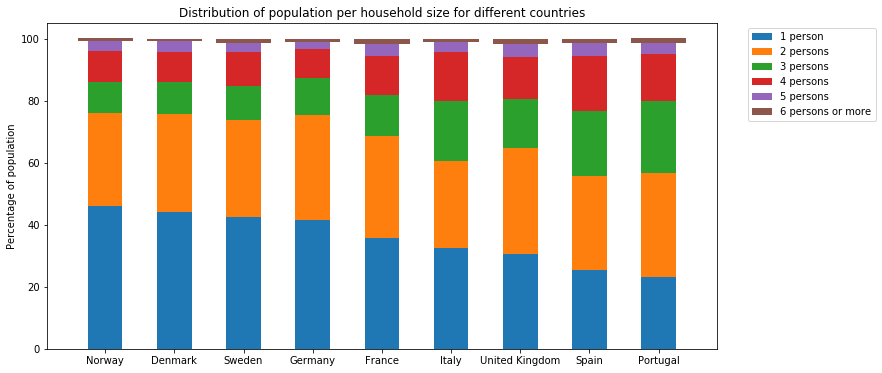

In [3]:
# households for each nordic country (Country, householdtype, share)

# Define figure size
plt.figure(figsize=[12,6])

N = 9
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

#plt.style.use(style_name)

p1 = plt.bar(ind, df_householdsEU_Timeline_NSE_2018['1 person'], width)
p2 = plt.bar(ind, df_householdsEU_Timeline_NSE_2018['2 persons'], width, 
             bottom=df_householdsEU_Timeline_NSE_2018['1 person'])
p3 = plt.bar(ind, df_householdsEU_Timeline_NSE_2018['3 persons'], width, 
             bottom=df_householdsEU_Timeline_NSE_2018['1 person']+df_householdsEU_Timeline_NSE_2018['2 persons'])
p4 = plt.bar(ind, df_householdsEU_Timeline_NSE_2018['4 persons'], width, 
             bottom=df_householdsEU_Timeline_NSE_2018['1 person']+df_householdsEU_Timeline_NSE_2018['2 persons']+df_householdsEU_Timeline_NSE_2018['3 persons'])
p5 = plt.bar(ind, df_householdsEU_Timeline_NSE_2018['5 persons'], width, 
             bottom=df_householdsEU_Timeline_NSE_2018['1 person']+df_householdsEU_Timeline_NSE_2018['2 persons']+df_householdsEU_Timeline_NSE_2018['3 persons']+df_householdsEU_Timeline_NSE_2018['4 persons'])
p6 = plt.bar(ind, df_householdsEU_Timeline_NSE_2018['6 persons or more'], 
             bottom=df_householdsEU_Timeline_NSE_2018['1 person']+df_householdsEU_Timeline_NSE_2018['2 persons']+df_householdsEU_Timeline_NSE_2018['3 persons']+df_householdsEU_Timeline_NSE_2018['4 persons']++df_householdsEU_Timeline_NSE_2018['5 persons'])



plt.title('Distribution of population per household size for different countries')
plt.ylabel('Percentage of population')
plt.xticks(ind, ('Norway', 'Denmark', 'Sweden', 'Germany', 'France', 'Italy', 'United Kingdom', 'Spain', 'Portugal'))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
           ('1 person', '2 persons', '3 persons', '4 persons', '5 persons', '6 persons or more'), 
           bbox_to_anchor=(1.04,1))


plt.show()

## Fatal cases related to Covid-19 in relation to the known infections of Covid-19

Dividing the fatal cases of a country for the most recent available date by the confirmed cases of the same country and date gives a mortality rate. This rate may be far from reality, as the confirmed cases of Covid-19 may not necessarily correspond to the actual number of cases. This also applies to the number of deaths caused by Covid-19. Different countries and regions have different rules as to when a death is included in the statistics of deaths caused by Covid-19. Furhermore, the number of known Covid-19 infections for a country depends on the number of tests performed. The more a country tests, the closer the number of confirmed infections should be to the actual number of infections present. Still the mortality rate as division of fatal cases by confirmed cases is an indicator.

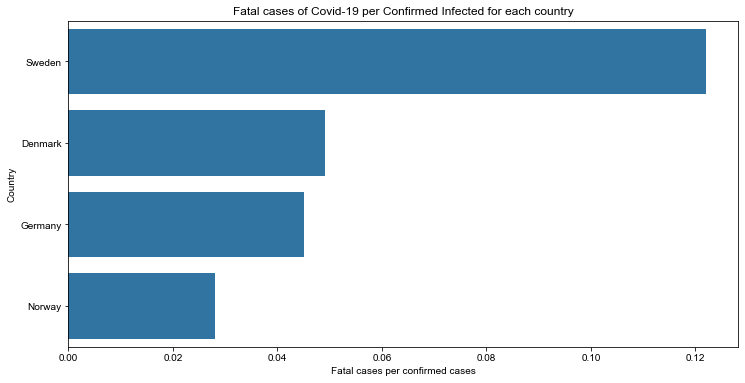

In [4]:
# Set color palette to just one
base_color = sb.color_palette()[0]

# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today_NE.sort_values('fatalPerConfirmed', ascending=False), 
           x='fatalPerConfirmed', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Fatal cases per confirmed cases')
plt.ylabel('Country');
plt.title('Fatal cases of Covid-19 per Confirmed Infected for each country')

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

## Boxplot of mortality rates for all countries in dataset

Norway has a mortality rate of 2.8% by May 17th, which lies in the first quartile of mortality rate of all countries. Denmark and Germany have a mortality rate somewhere between 4% and 5%, which corresponds to the second quartile, meaning that their mortality rates are below the worlds mean mortality rate. Sweden with 12,2% is in the fourth quartile. 
Again, the mortality rate we calculated here is based on the numbers submitted by each country. Countries performing less tests tend to subestimate the amount of infections and therefore the resulting mortality rate is overestimated. 

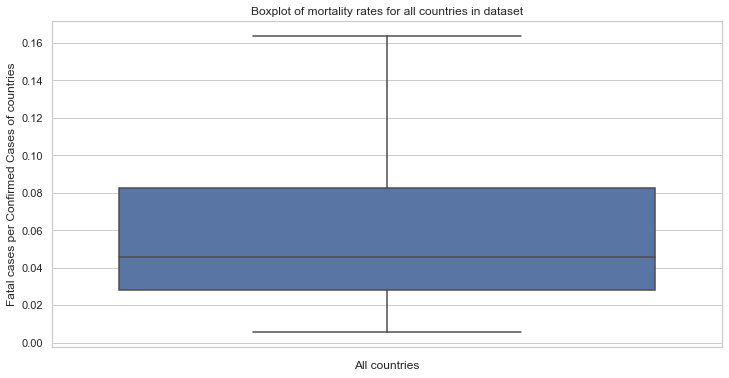

In [5]:
# Define figure size
plt.figure(figsize=[12,6])

# box plot with deaths per confirmed
df_covidCases_today['fatalPerConfirmed'] = df_covidCases_today['fatal'] / df_covidCases_today['confirmed']

sb.boxplot(data=df_covidCases_today, y='fatalPerConfirmed');

# Write lables and header
plt.xlabel('All countries')
plt.ylabel('Fatal cases per Confirmed Cases of countries');
plt.title('Boxplot of mortality rates for all countries in dataset');


## Correlation of Mean Household size with confirmed and fatal cases of Covid-19.

The visualization below shows us that the bigger the mean household and the higher the rate of Covid-19 infected people in a country, the higher is the amount of fatal cases. Having this graphic, we could conclude, that if a country's dot in the graphic is on the lower right side, it performed well stopping the spread of the virus even though the countries mean household size would have supported the propagation.
If a country's dot is placed on the upper right corner of this graphic and has a light color (yellow or light green), it performed well keeping the fatal cases even though the virus spread through the country. This country would have remained a low amount of fatal cases while it was hard hit with amount of infections due to the big mean household size.

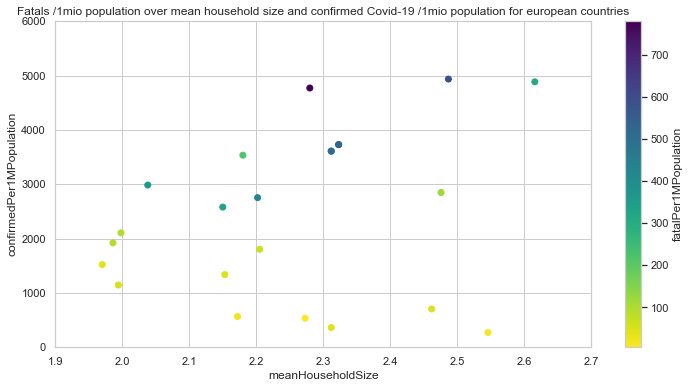

In [6]:
plt.figure(figsize=[12,6])
plt.scatter(data=df_covidCases_today_NSE, x='meanHouseholdSize', y='confirmedPer1MPopulation', c='fatalPer1MPopulation', cmap='viridis_r' );
plt.colorbar(label='fatalPer1MPopulation');
plt.xlabel('meanHouseholdSize');
plt.ylabel('confirmedPer1MPopulation');
axes = plt.gca()
axes.set_xlim([1.9,2.7])
axes.set_ylim([0,6000])
plt.title('Fatals /1mio population over mean household size and confirmed Covid-19 /1mio population for european countries');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!